## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [35]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Merge_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
Merge_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Checking the number of mice.
unique_mice = Merge_study_df["Mouse ID"].unique()

count_mice = len(unique_mice)
print(unique_mice)
print(f'The total number of Mice are {count_mice}')

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

In [37]:
# Remove Duplicate timepoints for a specific mouse from data frame
no_duplicates_data = Merge_study_df.drop_duplicates(subset=["Mouse ID","Timepoint"])

no_duplicates_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice in the clean DataFrame

count_no_duplicate = no_duplicates_data.count()

count_no_duplicate

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [39]:
# Checking the number of mice, it should still be 249
unique_mice_new = no_duplicates_data["Mouse ID"].unique()

count_mice_new = len(unique_mice_new)
print(unique_mice_new)
print(f'The total number of Mice are {count_mice_new}')

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
unique_regimen = no_duplicates_data['Drug Regimen'].unique()
unique_regimen


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [41]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_drug_stats = no_duplicates_data.groupby(['Drug Regimen'])
grouped_drug_stats.min().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,b128,Female,1,15,0,23.343598,0
Ceftamin,a275,Female,2,25,0,45.000000,0
Infubinol,a203,Female,1,23,0,36.321346,0
Ketapril,a457,Female,1,25,0,45.000000,0
Naftisol,a818,Female,2,25,0,45.000000,0


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Summary_stats = grouped_drug_stats.describe()
Summary_stats


Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          156.0  10.570513  7.188801  1.0   5.00   8.0  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          156.0  27.076923  ...          56.491585  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                156.0  1.000000  1.089540  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_stats_2 = grouped_drug_stats["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std'])
Summary_stats_2

,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.393463,50.909965,43.138803,6.568014
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

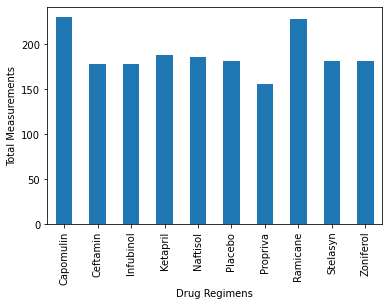

<Figure size 432x288 with 0 Axes>

In [44]:
#Generate a bar plot using pandas
bar_count = grouped_drug_stats["Mouse ID"].count()
Bar_pd = bar_count.plot(kind='bar')
Bar_pd.set_xlabel("Drug Regimens")
Bar_pd.set_ylabel("Total Measurements")

plt.show()
plt.tight_layout()

In [45]:
# Find our Variables for the py plot, need the arrays for the drug Regimen and Total Measurements
Measurements = np.array(grouped_drug_stats["Mouse ID"].count())
print(unique_regimen)
print(Measurements)


['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
[230 178 178 188 186 181 156 228 181 182]


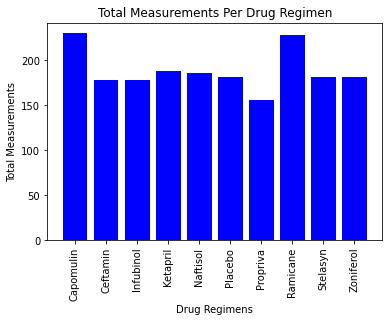

In [46]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = sorted(unique_regimen)
plt.bar(x_axis, Measurements, color='blue')

plt.title("Total Measurements Per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Total Measurements")
plt.xticks(rotation='vertical')

plt.show()

array([<AxesSubplot:ylabel='Drug Regimen'>], dtype=object)

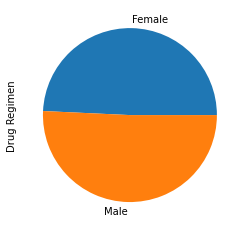

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pd_pie = no_duplicates_data.groupby(['Sex'])
pd_pie_count = pd_pie.count()

pd_pie_count['Drug Regimen'].plot.pie(subplots=True)

In [48]:
#Create lists for Pie Charts, first find the count of Sex
pd_pie = no_duplicates_data.groupby(['Sex'])
pd_pie_count = pd_pie.count()
py_pie = pd_pie_count["Mouse ID"]
print(py_pie)


Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64


In [49]:
#Create Lists for pie chart using pyplot
py_size = py_pie.values.tolist()
py_label = ["Female", "Male"]
print(py_size)
print(py_label)

[930, 958]
['Female', 'Male']


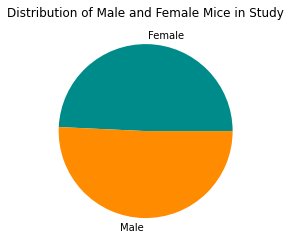

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(py_size, labels=py_label, colors=["darkcyan", "darkorange"])
plt.title("Distribution of Male and Female Mice in Study")
plt.show()

## Quartiles, Outliers and Boxplots

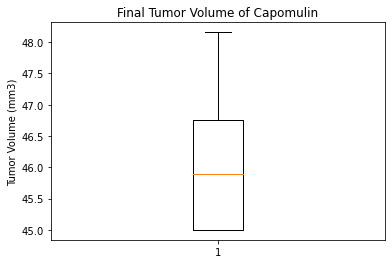

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin
# Start by getting the last (greatest) timepoint for each mouse
# Extract data 
Capomulin_box = no_duplicates_data.loc[no_duplicates_data["Drug Regimen"]=='Capomulin',:]
#Capomulin_box.head()
Capomulin_box_clean = Capomulin_box[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#Group by Mouse ID to find the maximum timepoints per mouse
Capomulin_box_grouping = Capomulin_box_clean.groupby(["Mouse ID"])
Capomulin_box_max = Capomulin_box_grouping.max()
#print(Capomulin_box_max)
 

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Capomulin")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(Capomulin_box_max["Tumor Volume (mm3)"])

plt.show()



In [52]:
Capomulin_q = Capomulin_box_max["Tumor Volume (mm3)"]
quartiles = Capomulin_q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 46.74900552
The interquartile range of Capomulin is: 1.7490055199999972
The the median of Capomulin is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


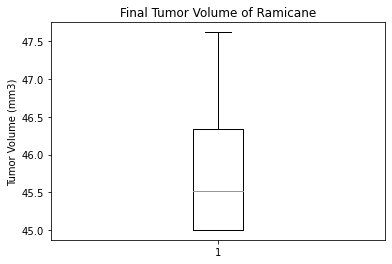

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Ramicane
# Extract data 
Ramicane_box = no_duplicates_data.loc[no_duplicates_data["Drug Regimen"]=='Ramicane',:]
#Ramicane_box.head()
Ramicane_box_clean = Ramicane_box[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#Group by Mouse ID to find the maximum timepoints per mouse
Ramicane_box_grouping = Ramicane_box_clean.groupby(["Mouse ID"])
Ramicane_box_max = Ramicane_box_grouping.max()
#print(Ramicane_box_max)
 

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Ramicane")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(Ramicane_box_max["Tumor Volume (mm3)"])

plt.show()

In [54]:
Ramicane_q = Ramicane_box_max["Tumor Volume (mm3)"]
quartiles = Ramicane_q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 46.34383237
The interquartile range of Ramicane is: 1.3438323700000012
The the median of Ramicane is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


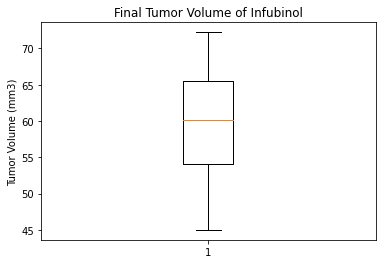

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Infubinol
# Extract data 
Infubinol_box = no_duplicates_data.loc[no_duplicates_data["Drug Regimen"]=='Infubinol',:]
#Infubinol_box.head()
Infubinol_box_clean = Infubinol_box[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#Group by Mouse ID to find the maximum timepoints per mouse
Infubinol_box_grouping = Infubinol_box_clean.groupby(["Mouse ID"])
Infubinol_box_max = Infubinol_box_grouping.max()
#print(Infubinol_box_max)
 

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Infubinol")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(Infubinol_box_max["Tumor Volume (mm3)"])

plt.show()

In [56]:
Infubinol_q = Infubinol_box_max["Tumor Volume (mm3)"]
quartiles = Infubinol_q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


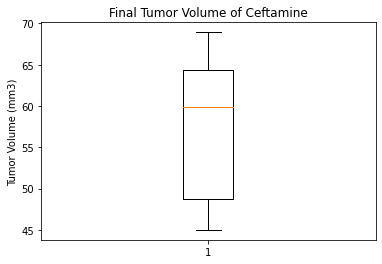

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Ceftamin
# Extract data 
Ceftamin_box = no_duplicates_data.loc[no_duplicates_data["Drug Regimen"]=='Ceftamin',:]
#Ceftamin_box.head()
Ceftamin_box_clean = Ceftamin_box[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#Group by Mouse ID to find the maximum timepoints per mouse
Ceftamin_box_grouping = Ceftamin_box_clean.groupby(["Mouse ID"])
Ceftamin_box_max = Ceftamin_box_grouping.max()
#print(Ceftamin_box_max)
 

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Ceftamine")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(Ceftamin_box_max["Tumor Volume (mm3)"])

plt.show()

In [58]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ceftamin_q = Ceftamin_box_max["Tumor Volume (mm3)"]
quartiles = Ceftamin_q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamine is: {lowerq}")
print(f"The upper quartile of Ceftamine is: {upperq}")
print(f"The interquartile range of Ceftamine is: {iqr}")
print(f"The the median of Ceftamine is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamine is: 48.72207785
The upper quartile of Ceftamine is: 64.29983003
The interquartile range of Ceftamine is: 15.577752179999997
The the median of Ceftamine is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


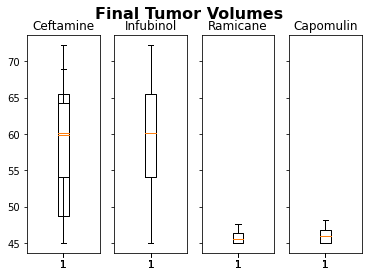

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True)
fig.suptitle("Final Tumor Volumes", fontsize=16, fontweight="bold")


ax1.set_title("Ceftamine")
ax1.boxplot(Ceftamin_box_max["Tumor Volume (mm3)"])
ax1.boxplot(Infubinol_box_max["Tumor Volume (mm3)"])

ax2.set_title("Infubinol")
ax2.boxplot(Infubinol_box_max["Tumor Volume (mm3)"])


ax3.set_title("Ramicane")
ax3.boxplot(Ramicane_box_max["Tumor Volume (mm3)"])


ax4.set_title("Capomulin")
ax4.boxplot(Capomulin_box_max["Tumor Volume (mm3)"])

plt.show()

## Line and Scatter Plots

In [60]:
# Extract data s185 (Capomulin test subject) for tumor volume vs time point to create a plot
s185_data = no_duplicates_data.loc[no_duplicates_data["Mouse ID"]=='s185',:]
#s185_data.head()
s185_data_Cleaned = s185_data[["Timepoint", "Tumor Volume (mm3)"]]
s185_data_Cleaned.head()

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876


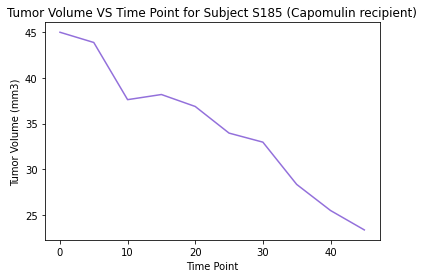

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin--s185
s185_x = s185_data_Cleaned["Timepoint"]
s185_y = s185_data_Cleaned["Tumor Volume (mm3)"]

plt.plot(s185_x, s185_y, color="mediumpurple")
plt.title("Tumor Volume VS Time Point for Subject S185 (Capomulin recipient)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [62]:
# Extract data for Capomulin only to create scatter
Capomulin_data = no_duplicates_data.loc[no_duplicates_data["Drug Regimen"]=='Capomulin',:]
#Capomulin_data.head()
Capomulin_data_Cleaned = Capomulin_data[["Weight (g)", "Tumor Volume (mm3)"]]
Capomulin_data_Cleaned.head()

,Weight (g),Tumor Volume (mm3)
10,17,45.000000
11,17,43.878496
12,17,37.614948
13,17,38.177232
14,17,36.866876


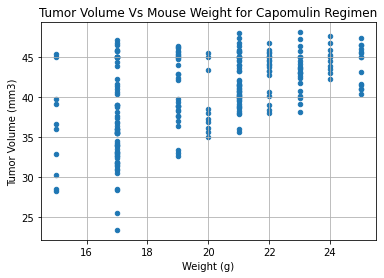

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_data_Cleaned.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)", grid=True, title="Tumor Volume Vs Mouse Weight for Capomulin Regimen")
plt.show()

## Correlation and Regression

In [64]:
# Calculate the correlation coefficient and linear regression model 
print(f"The correlation coefficient is {round(st.pearsonr(Capomulin_data_Cleaned['Weight (g)'], Capomulin_data_Cleaned['Tumor Volume (mm3)'])[0],2)}")



The correlation coefficient is 0.53


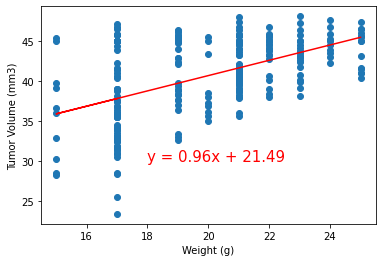

In [65]:
#Plot Linear Regression Model on top of scatter plot
 # Add the linear regression equation and line to plot
x_values = Capomulin_data_Cleaned['Weight (g)']
y_values = Capomulin_data_Cleaned['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,30),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()